In [1]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os
from scipy.stats import mannwhitneyu

In [2]:
# Set filepath
rep='/home/ebb505/ARE_Project/are-logs/'
#repBL='/home/ebb505/ARE_Project/are-logs/PPSN/BL/'
#repPN='/home/ebb505/ARE_Project/are-logs/PPSN/NS/'
repGR='/home/ebb505/ARE_Project/are-logs/PPSN/GRi/'
#repPGR='/home/ebb505/ARE_Project/are-logs/PPSN/GRe/'
filename='noreptests.csv' # REMEMBER TO NOT COUNT UNTIL -1
#filename='tests.csv' # REMEMBER TO COUNT UNTIL -1
oFn='dist'

In [3]:
# Get all directories
# foldBL = []
# foldPN = []
foldGR = []
# foldPGR = []
# r=root, d=directories, f = files
# for r, d, f in os.walk(repBL):
#     for folder in d:
#         foldBL.append(os.path.join(r, folder))
# for r, d, f in os.walk(repPN):
#     for folder in d:
#         foldPN.append(os.path.join(r, folder))
for r, d, f in os.walk(repGR):
    for folder in d:
        foldGR.append(os.path.join(r, folder))
# for r, d, f in os.walk(repPGR):
#     for folder in d:
#         foldPGR.append(os.path.join(r, folder))

In [4]:
print("GR = ", len(foldGR))

GR =  29


In [5]:
repGR = []
for f in foldGR:
    my_list = []
    with open(f + '/' + filename, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[:-1]) 
    repGR.append(my_list)

In [6]:
population = 40
#replicates = len(repGR)
replicates = 20
#evaluations = len(repBL[0])
evaluations = 20000
features = len(repGR[0][0])
generations = int(evaluations / population)
print("Replicates: ", replicates, "Evaluations: ", evaluations, "Features: ", features, "Generations: ", generations)

Replicates:  20 Evaluations:  20000 Features:  6 Generations:  500


In [7]:
sumRepGR = []
for i in range(replicates):
    dat = np.array([[float(y) for y in x] for x in repGR[i]]) # Convert to array
    counter = 0
    for j in range(len(repGR[i])):
        if(dat[j,1] > 0 \
           and dat[j,2] > 0 \
           and dat[j,3] > 0 \
           and dat[j,4] > 0 \
           and dat[j,5] > 0 \
          ):
            counter = counter + 1
    sumRepGR.append(counter/len(repGR[i]))
    print(i)
print("Done!")
print(sumRepGR)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
Done!
[0.664794697109188, 0.4918241456966611, 0.5796121332670313, 0.5265647011471121, 0.5272409539473685, 0.5695911324898044, 0.5561399959538742, 0.527237941798409, 0.5292150304938029, 0.44932432432432434, 0.5094206549118387, 0.5881169142309535, 0.5923486986516149, 0.4939624556062912, 0.5479273311251631, 0.5906563932507559, 0.5602110490378647, 0.5747161394971614, 0.4891833143566919, 0.5180452594615684]


In [8]:
sampleSizes = [1,2,3,4,5]
allDist = []
# For each sample size
for i in range(len(sampleSizes)):
    sampDis = []
    # For each distribution
    for j in range(5):
        tempDist = []
        for k in range(sampleSizes[i]):
            #print(k)
            tempDist.append(sumRepGR[k+j])  
            #print(sumRepGR[k*j])
        sampDis.append(tempDist)
    allDist.append(sampDis)

In [9]:
print(len(allDist))
print(len(allDist[0]))
print(len(allDist[1][0]))
print(len(allDist[1][1]))
print(allDist[0][3])

5
5
2
2
[0.5265647011471121]


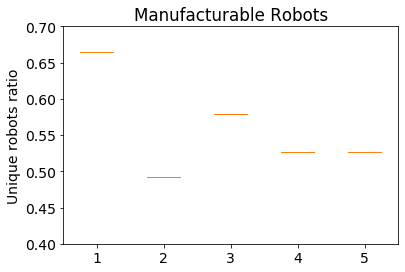

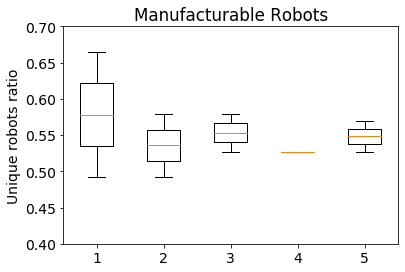

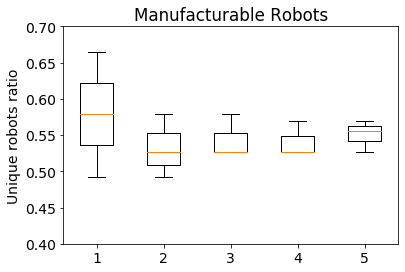

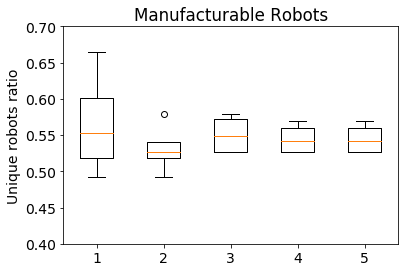

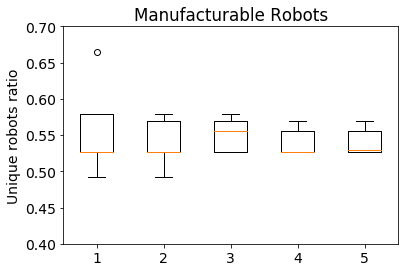

In [10]:
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}
plt.rc('font', **font)

for i in range(len(sampleSizes)):
    plt.figure(i)
    # Plot box plot stuff
    plt.boxplot([allDist[i][0], allDist[i][1], allDist[i][2], allDist[i][3], allDist[i][4]])
    #Label and stuff
    axes = plt.gca()
    axes.set_ylim([0.4,0.7])
    plt.ylabel('Distributions')
    plt.ylabel('Unique robots ratio')
    plt.title("Manufacturable Robots")
    rangeX = [1,2,3,4,5]
    posX = [1,2,3,4,5]
    plt.xticks(posX,rangeX)
    plt.savefig(rep+oFn+str(i)+'.png', dpi=200)

In [82]:
statTable = []
for i in range(len(sampleSizes)):
    statRow = []
    for j in range(len(sampleSizes)):
        if(i!=j):
            stat, p = mannwhitneyu(allDist[4][i], allDist[4][j])
            statRow.append(p)
    print(np.max(statRow))
    statTable.append(statRow)
print(statTable)


0.41238904754125666
0.41238904754125666
0.5
0.5
0.41238904754125666
[[0.326547557466091, 0.41238904754125666, 0.3312602917700287, 0.3312602917700287], [0.326547557466091, 0.326547557466091, 0.41238904754125666, 0.3312602917700287], [0.41238904754125666, 0.326547557466091, 0.5, 0.41238904754125666], [0.3312602917700287, 0.41238904754125666, 0.5, 0.326547557466091], [0.3312602917700287, 0.3312602917700287, 0.41238904754125666, 0.326547557466091]]
